# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (50,20))

In [5]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

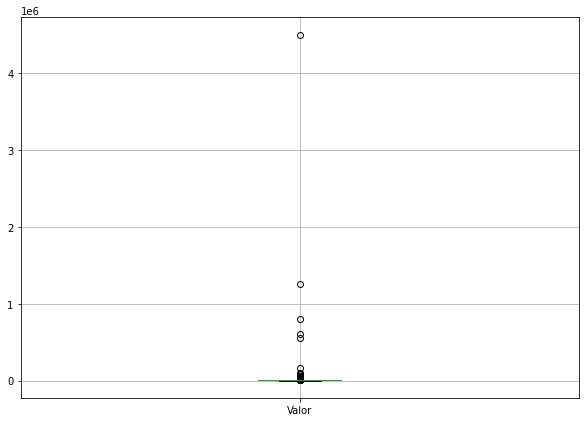

In [6]:
# Observando valores outliers
'''Observa-se que existem valores de alugueis absurdos que custa mais de 4 milhões, provavelmente houve
    um erro na digitação e esse seria o valor para venda'''
plt.rc('figure', figsize = (10,7))
dados.boxplot(['Valor'])

In [7]:
# Imóveis com aluguel maior que 500 mil
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN,4907.98,Casa
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN,15000.00,Apartamento


In [9]:
# Obtendo uma Series da base de dados, para desenvolver os quantiles
valor = dados['Valor']

In [10]:
# Limite dos quantiles
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
# Seleção dos valores que está entre limite inferior e limite superior, e atribuindo em uma nova variavel com base no dataset
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

In [24]:
type(valor)

pandas.core.series.Series

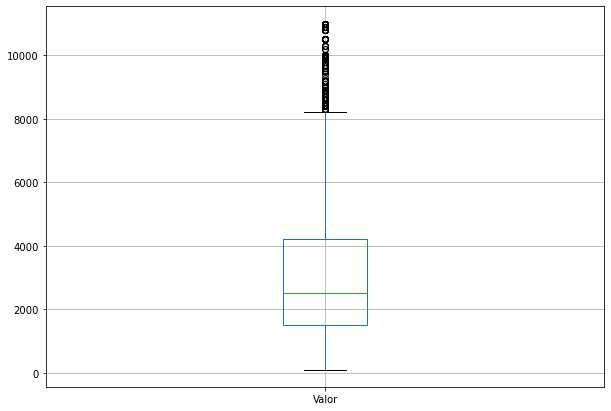

In [12]:
# Boxplot da seleção
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA9D7A9A30>]],
      dtype=object)

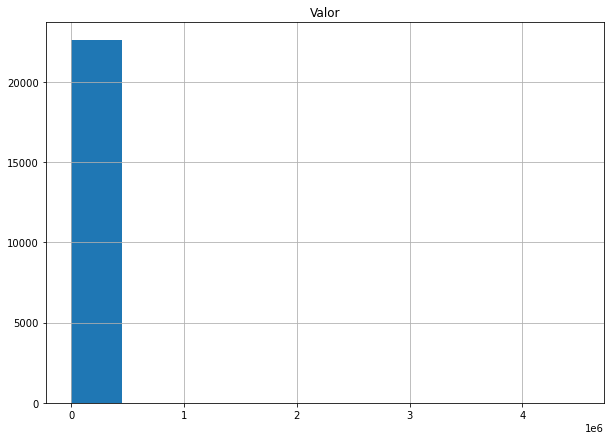

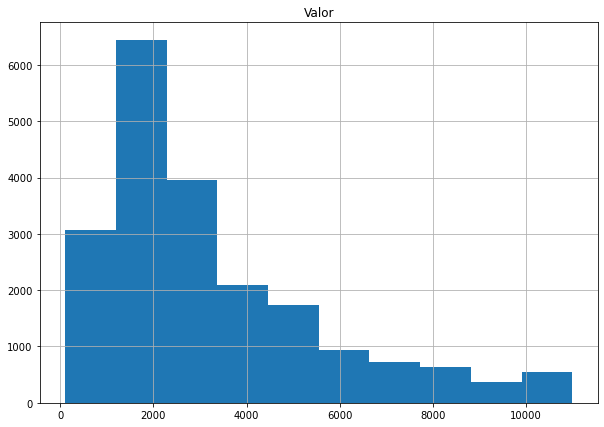

In [13]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Parte 2

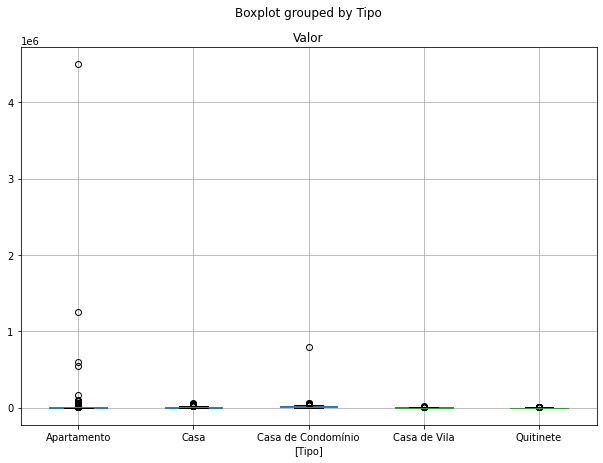

In [14]:
# Boxplot dos valores por tipo
dados.boxplot(['Valor'], by = ['Tipo'])

In [30]:
# Variável recebendo uma series groupby tipo e valor do tipo
grupo_tipo = dados.groupby('Tipo')['Valor']

In [31]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     5,     8,     9,    10,    11,    13,
                15,
             ...
             22567, 22568, 22570, 22571, 22572, 22573, 22575, 22577, 22578,
             22579],
            dtype='int64', length=19532),
 'Casa': Int64Index([    1,    24,    56,    60,   100,   104,   150,   166,   188,
               248,
             ...
             22332, 22357, 22365, 22420, 22425, 22452, 22510, 22535, 22547,
             22558],
            dtype='int64', length=967),
 'Casa de Condomínio': Int64Index([    6,     7,    14,    18,    44,    61,   172,   174,   191,
               217,
             ...
             22462, 22464, 22472, 22506, 22517, 22518, 22536, 22545, 22555,
             22574],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   85,   222,   230,   314,   343,   718,   846,   868,   943,
              1042,
             ...
             21922, 21927, 21991, 22067, 22096, 22109, 22338, 22387, 22469

In [32]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [33]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [34]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [35]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [36]:
IIQ

Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [37]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [38]:
limite_superior

Tipo
Apartamento           10100.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [39]:
 limite_superior['Apartamento']

10100.0

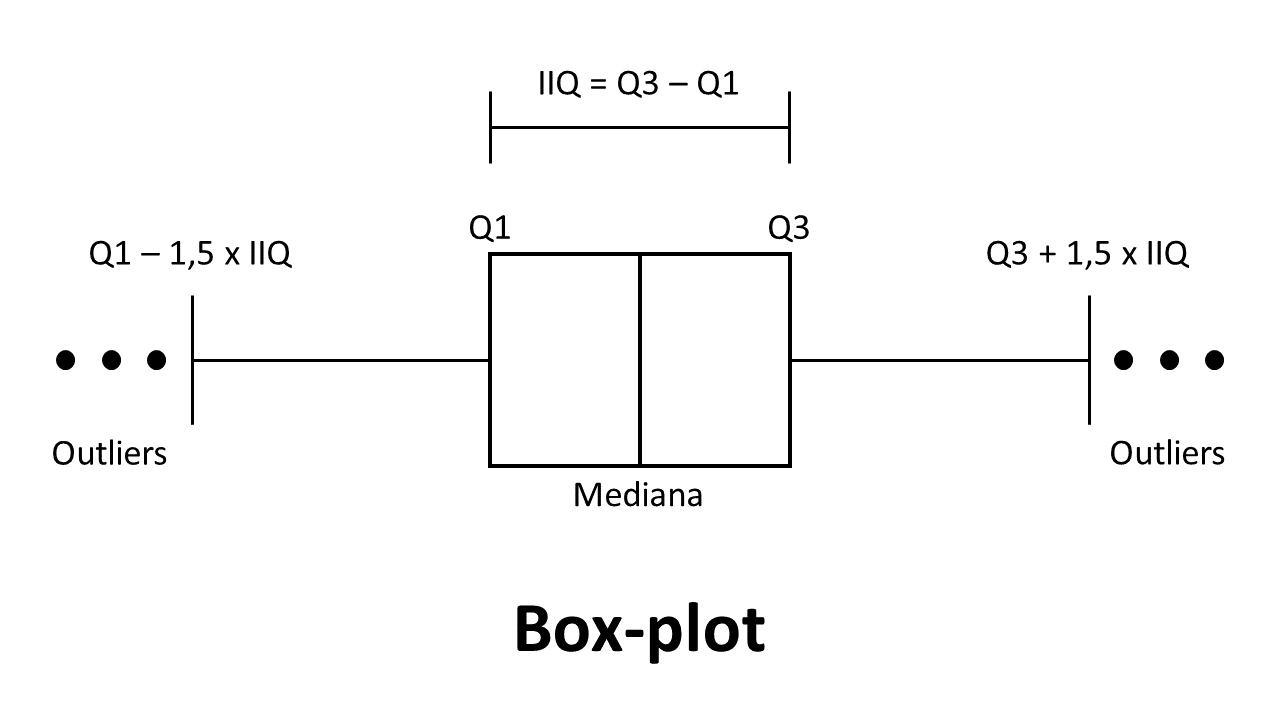

In [41]:
# Apenas importando uma imagem com uma breve explicação do boxplot
from IPython.display import Image
Image(filename = 'box-plot.png')

In [44]:
# 1º seleção é para interar em todos os tipos, já que temos mais de uma variável
# 2° seleção é para saber se o imóvel está dentro da seleção de limites definida para o boxplot
# 3º junta as seleções em uma uma única seleçao para atribuir ao dataframe
# 4º Na primeira interação, dados_new estará vazio, e então seria inserido o dados_selecao, em que o primeiro item é Apartamento.
# Esse processo será repetido com todos os outros tipos de imóvel
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

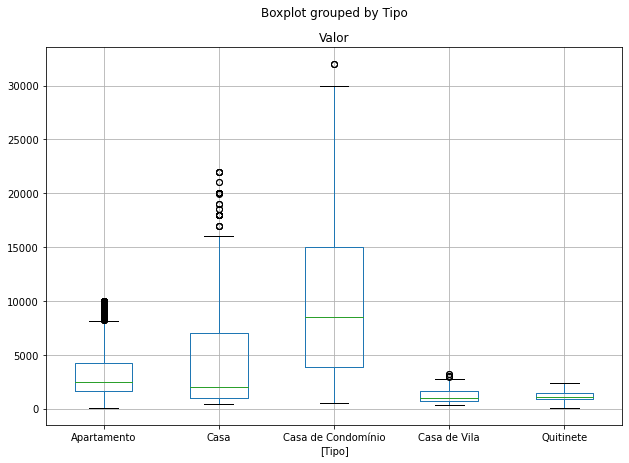

In [45]:
 dados_new.boxplot(['Valor'], by = ['Tipo'])

In [46]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)